In [44]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [10,7]
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2 Linear regression with one variable

## 2.1 Plotting the Data

In [2]:
data = np.loadtxt('ex1_octave/ex1data1.txt', delimiter=',')
x, y = data[:,0], data[:,1]
m = len(y)

In [3]:
print(x)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [4]:
print(y)

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


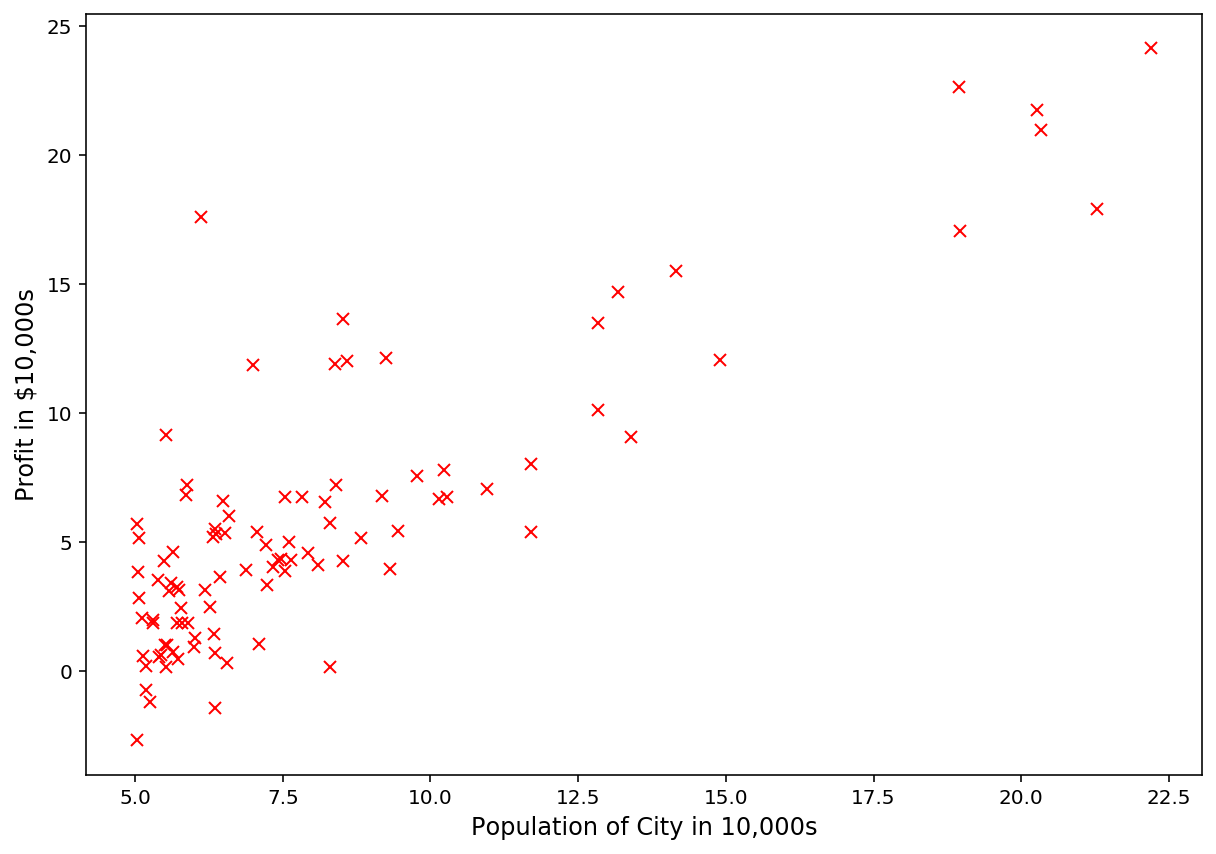

In [5]:
plt.figure(figsize=(10,7))
plt.plot(x, y, 'x', color='r')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s');

## 2.2 Gradient Descent

In [10]:
def computeCost(X, y, theta):
    
    dt = np.dot(X, theta) - y
    
    return np.dot(dt, dt) / 2 / m

In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # initialize some numbers #
    
    # number of training samples
    m = len(y)
    
    # cost function history
    J_history = np.zeros(num_iters)
    
    # start loop
    theta_new = theta.copy()
    for ii in range(num_iters):
        
        # update theta --> update rule for gradient descent
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        
        # store cost function
        J_history[ii] = computeCost(X, y, theta_new)
        
    return theta_new, J_history      

- gradient gives direction, learning rate determines how big a step
- get familiar with `numpy`

In [12]:
# initialize data array
X = np.ones((m, 2))
X[:,1] = data[:,0]

# initalize model
theta = np.zeros(2)

### 2.2.3 Computing the cost $J(\theta)$

In [13]:
# compute the cost function for theta = zeros
computeCost(X, y, theta)

32.07273387745567

### 2.2.4 Gradient descent

In [14]:
# algorithm parameters
alpha = 0.01
iterations = 1500

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [15]:
theta_new

array([-3.63029144,  1.16636235])

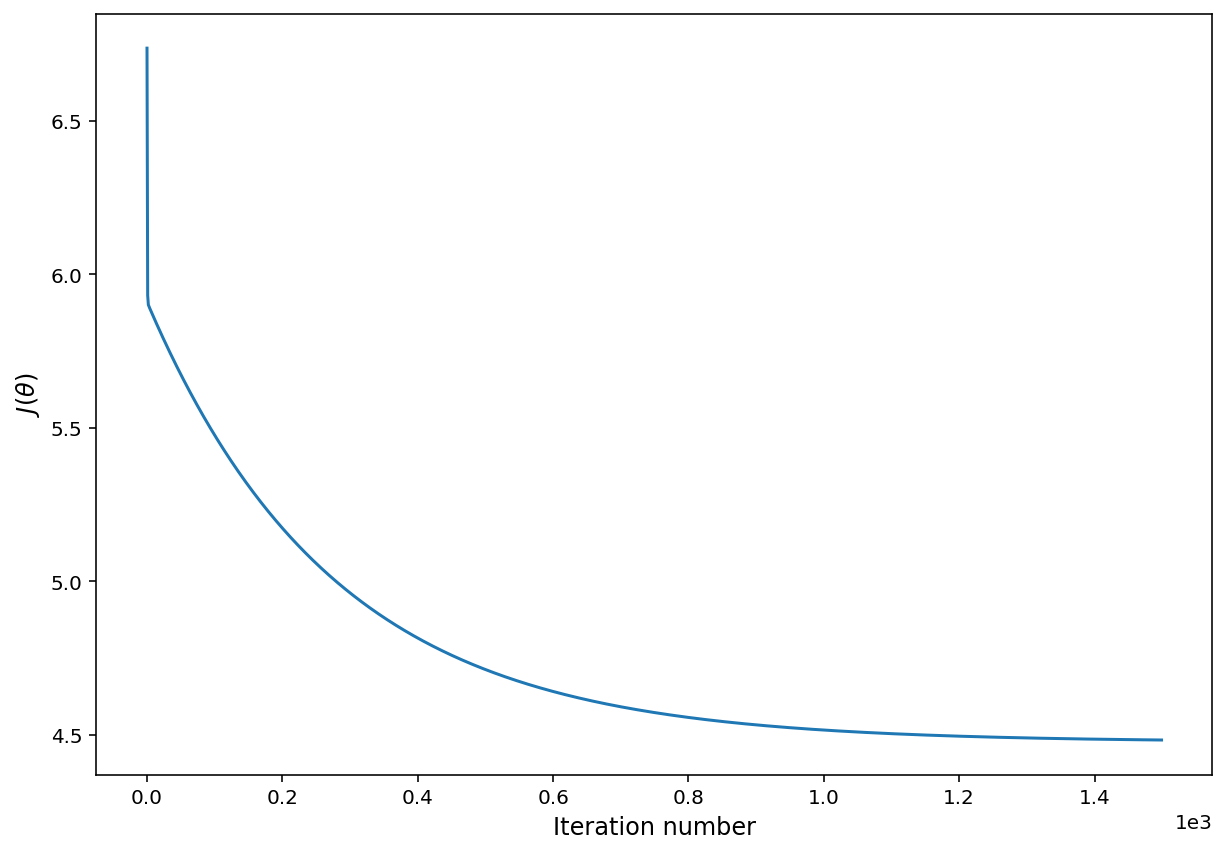

In [18]:
# Plot cost function vs. iteration
plt.figure(figsize=(10,7))
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$');

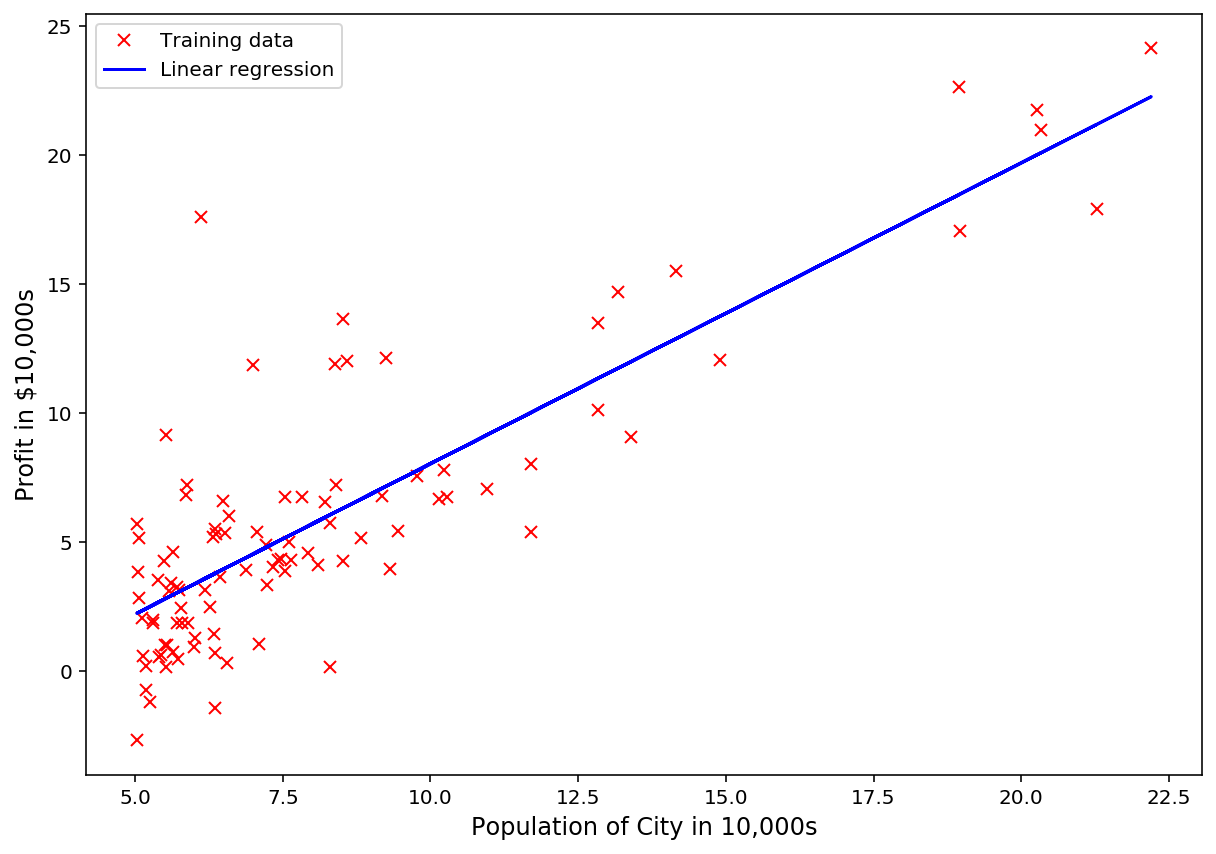

In [28]:
# plot data along with Linear regression
plt.figure(figsize=(10,7))
plt.plot(x, y, 'x', color='r', label='Training data')
plt.plot(x, np.dot(X, theta_new), label='Linear regression', color='b')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s')
plt.legend(loc='best');

## 2.4 Visualizing $J(\theta)$

In [29]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([t0, t1])
        J_vals[ii,jj] = computeCost(X, y, t)

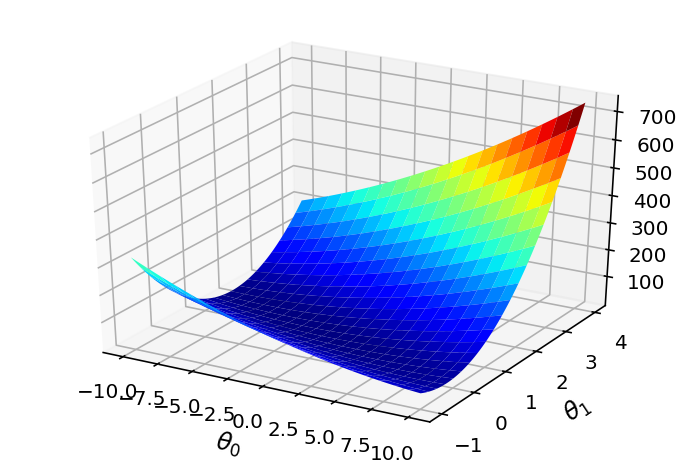

In [31]:
# make Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=5, 
                       cstride=5, antialiased=True)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$');

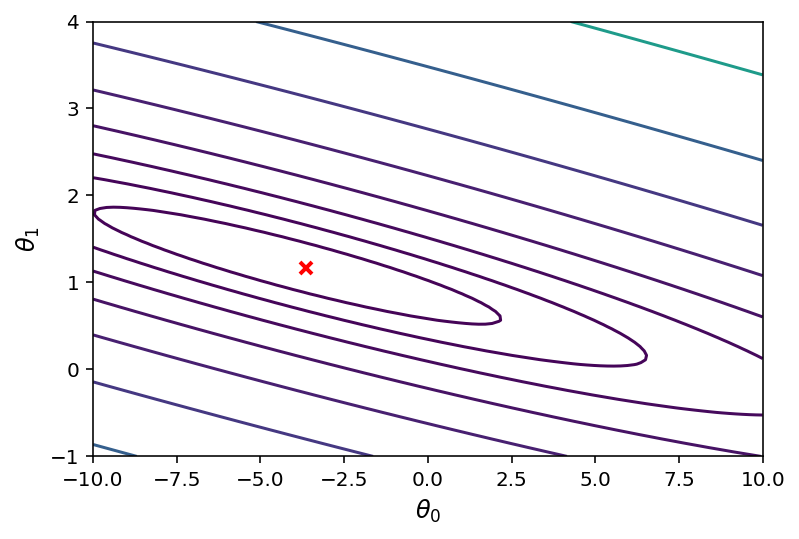

In [33]:
# make contour plot
plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'x', color='r', mew=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$');

# 3 Linear regression with multiple variables

In [34]:
# read in the data
data = np.loadtxt('ex1_octave/ex1data2.txt', delimiter=',')
x, y = data[:,:-1], data[:,-1]
m = len(y)

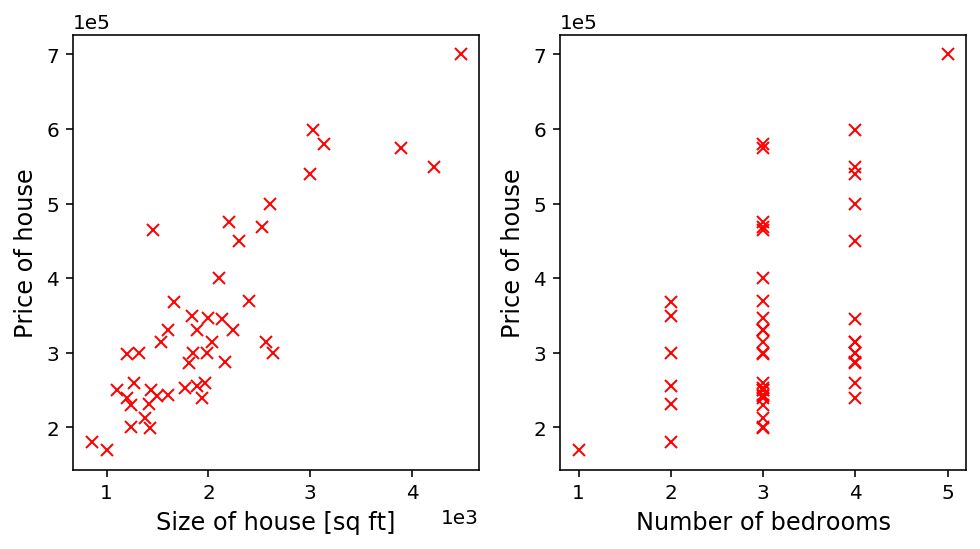

In [36]:
# plot the data
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house');

## 3.1 Feature Normalization

In [37]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma    

## 3.2 Gradient Descent

In [38]:
# normalize features
X, mu, sigma = featureNormalize(x)

# add mean
X = np.hstack((np.ones((X.shape[0],1)), X))

In [39]:
# gradient descent values
alpha = 0.01
iterations = 400
theta = np.zeros(3)

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [40]:
theta_new

array([334302.06399328,  99411.44947359,   3267.01285407])

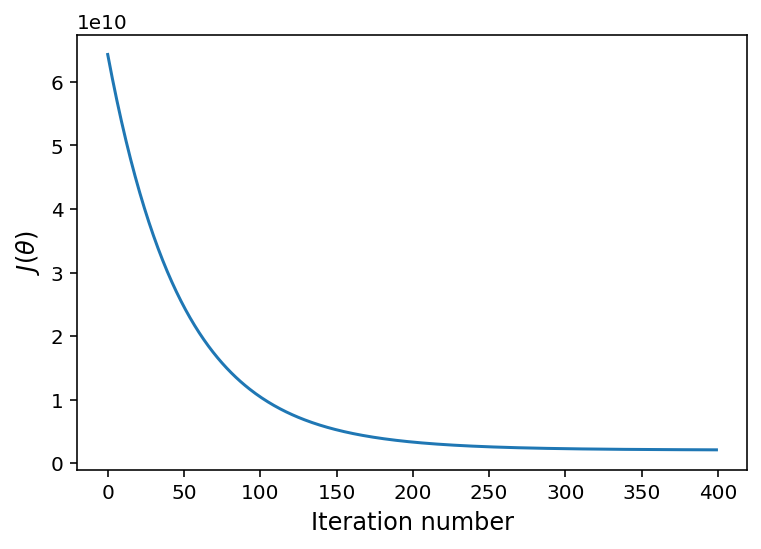

In [41]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$');

In [43]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = (np.array([1650, 3]) - mu) / sigma
vals = np.hstack((np.array([1]), vals))

predict = np.dot(theta_new, vals)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $289221.55


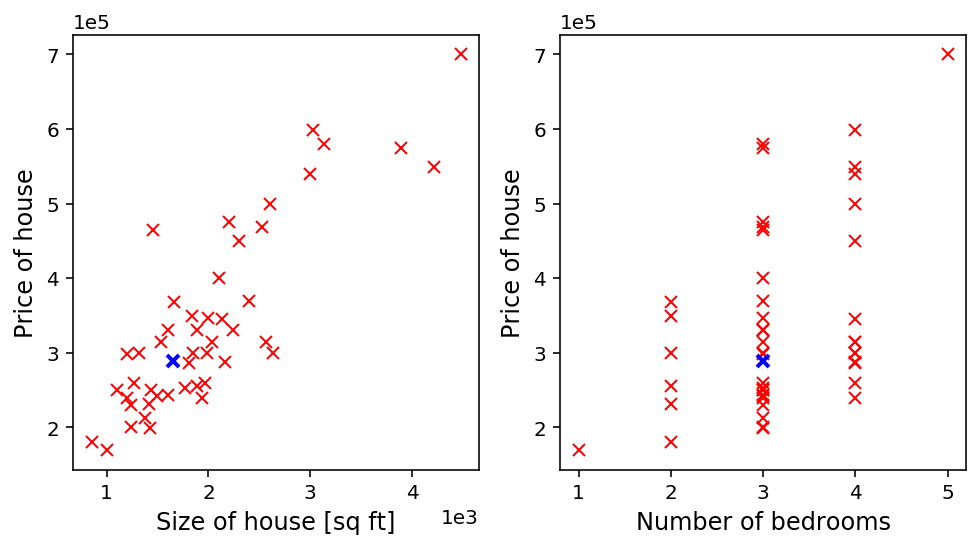

In [45]:
# plot the data and prediction
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].plot(1650, predict, 'x', color='b', mew=2)
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].plot(3, predict, 'x', color='b', mew=2)
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house');

### 3.2.1 Selecting Learning Rates

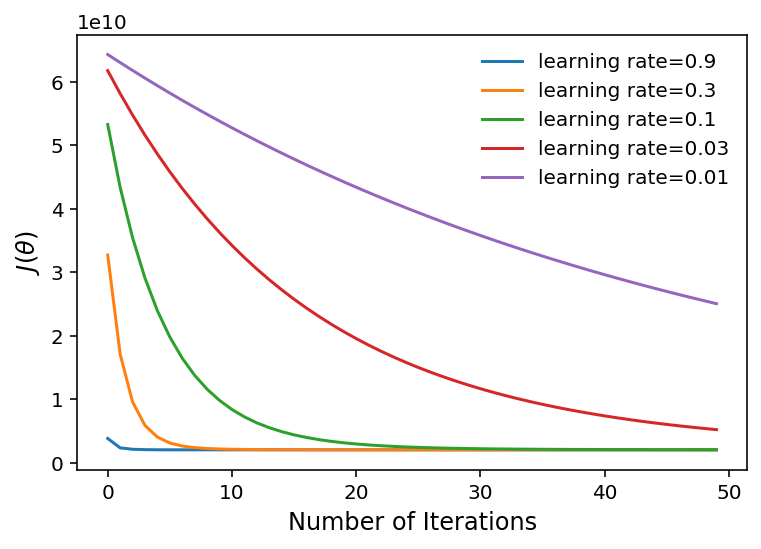

In [46]:
alphas = [0.9, 0.3, 0.1, 0.03, 0.01]
for alpha in alphas:
    theta_new, J_history = gradientDescent(X, y, theta, alpha, 50)
    plt.plot(J_history, label='learning rate={0}'.format(alpha))

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc='best', frameon=False)
    

## 3.2 Normal Equations

In [47]:
def normalEqn(X, y):
    
    inv_term = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(inv_term, np.dot(X.T, y))
    
    return theta

In [48]:
# re-compute X with out normalization
X = np.hstack((np.ones((x.shape[0],1)), x))

# get solution with normal equation
theta_norm = normalEqn(X, y)

In [49]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = np.array([1650, 3])
vals = np.hstack((np.array([1]), vals))

# this is the same answer as above if run for more iterations
predict = np.dot(theta_norm, vals)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $293081.46


# _[An Introduction to Gradient Descent and Linear Regression](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)_

Everything below this serves as a continuation of the above, however, they are not necessarily associated with the Intro to ML course. I figured it'd be best to keep experimenting in order to better understand gradient descent. **The title is a link the article that the work/notes below are from. Also the article uses linear regression to explain gradient descent.**

### _Notes_
- theoretical level --> gradient descent is algorithm that minimizes functions
- given function defined by set of parameters --> start with initial set of parameter values --> iteratively move toward a set of parameter values that minimize function
    - iterative minimization --> achieved using calculus --> takes steps in negative direction of the function [gradient](https://en.wikipedia.org/wiki/Gradient)


In [1]:
import numpy as np
import pandas as pd

points = np.genfromtxt('ex1_octave/data.csv', delimiter=',')

- standard line equation: `y = mx + b`
- to find best line for data --> need to find best slope and y-intercept
- standard approach --> define an error (or cost) function --> measures how 'good' a given line is
- function will take in a (m, b) pair --> return error value on how well it fits data
- to compute error --> iterate through each (x, y) point in data set --> sum the square distances between each point's y value and candidate line's y value
    - conventional to square distance --> ensures it is positive, makes our error function differentiable

In [2]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points.y[i] - (m * points.x[i] + b)) ** 2
    return totalError / float(len(points))

![errors](img/linear_regression_error1.png)

- this is what our error function looks like
- if we minimize this function --> will get the best line for our data
- error line currently consists of two parameters (m and b) --> can visualize as two-dimensional surface

![2D-parameters](img/gradient_descent_error_surface.png)

- each point in two-dimensional space represents a line --> height of function at each point **is the error value for that line**
    - lower points (i.e. lines) yield smaller errors (i.e. fit data better)
- with gradient descent --> start from some location on this surface --> move downhill to find point (i.e. line) with lowest error
- to run gradient descent on error function --> need to compute [gradient](https://en.wikipedia.org/wiki/Gradient)
    - acts like compass --> always points downhill
    - to compute, need to differentiate error function
    - our function is defined by two parameters (m and b) --> need to compute partial derivative for each
    
![partial-derivatives](img/linear_regression_gradient1.png)

In [3]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points.y[i] - ((m_current*points.x[i]) + b_current))
        m_gradient += -(2/N) * points.x[i] * (points.y[i] - ((m_current * points.x[i]) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

- `learningRate` controls how large of a step we take downhill during each iteration
    - too large a step --> may step over minimum
    - too small a step 00< require many iterations to arrive at minimum

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

In [5]:
def run():
    points = pd.read_csv('ex1_octave/data.csv', header=None, names=['x', 'y']) #np.genfromtxt('ex1_octave/data.csv', delimiter=',')
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    print(f'Starting gradient descent at b={initial_b}, m={initial_m},\
    error={compute_error_for_line_given_points(initial_b, initial_m, points)}')
    print('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print(f'After {num_iterations} iterations b={b}, m={m}, error={compute_error_for_line_given_points(b, m, points)}')

In [6]:
run()

Starting gradient descent at b=0, m=0,    error=5565.10783448321
Running...
After 1000 iterations b=0.08893651993741353, m=1.4777440851894448, error=112.61481011613472


## _[fast.ai Linear Regression Problem](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb)_

The following is from fast.ai's notebook that explains gradient descent. 

In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[-0.7444,  1.0000],
        [-0.4420,  1.0000],
        [ 0.8719,  1.0000],
        [ 0.3057,  1.0000],
        [-0.5384,  1.0000]])

In [4]:
a = tensor(3., 2); a

tensor([3., 2.])

In [8]:
print(x@a)

tensor([-0.2332,  0.6741,  4.6158,  2.9172,  0.3848,  1.5280,  0.5381,  2.6404,
         1.0082,  1.6655,  1.0561,  1.1616,  0.1235,  2.1278,  1.8240,  4.5581,
         4.9014,  3.1986,  0.3279,  4.3183,  1.5465,  3.6139,  2.7947,  0.8007,
         4.2764, -0.1284, -0.1975,  0.0675,  0.4623,  4.4994,  2.0110, -0.9517,
         4.8870,  1.9966, -0.8146,  0.4841,  4.4489,  0.0720,  0.8446, -0.6416,
        -0.9878,  4.7269,  2.5987, -0.6018,  1.6997,  1.5016,  0.4213, -0.8512,
         2.2025,  3.0569, -0.9729,  4.8805,  3.2132,  0.4280,  1.4038, -0.3331,
         2.9376,  0.1604,  4.0972,  3.3880,  4.4210,  4.8918,  2.4394,  1.0785,
         3.5325,  3.9368,  3.4919, -0.1252,  4.1140,  4.0592, -0.7310,  4.6062,
         2.5374, -0.6671,  2.3574,  1.2012,  1.3121,  1.0357,  1.2676,  1.4602,
         4.3710,  4.6057,  1.7728,  0.2955,  2.7727,  1.4732,  0.1311,  4.8301,
         1.5966,  0.4514,  4.7266,  1.7318,  2.2128,  2.0855,  3.1714,  4.2863,
        -0.6716,  0.3957,  1.6101, -0.46

In [9]:
y = x@a + torch.rand(n); y

tensor([ 0.4402,  1.6495,  5.4445,  3.6509,  0.7490,  1.9613,  1.0599,  2.7060,
         1.2445,  2.2634,  1.6861,  1.8441,  0.5952,  2.9889,  1.8483,  5.2191,
         4.9854,  3.6771,  0.4289,  4.9679,  2.4662,  4.3110,  3.2730,  1.1878,
         5.0600, -0.0187,  0.3281,  0.6988,  0.5820,  5.0961,  2.8158, -0.1193,
         5.2232,  2.1484, -0.6380,  0.6075,  5.0799,  0.5747,  1.0737, -0.5952,
        -0.2813,  5.3469,  3.0547, -0.1426,  2.0570,  1.5769,  1.1045,  0.0880,
         3.1560,  3.2328, -0.1643,  4.9087,  3.9060,  0.7519,  1.9370,  0.0078,
         3.7751,  1.1262,  5.0235,  3.3924,  5.2016,  5.1261,  2.7629,  1.9119,
         3.7954,  4.5502,  4.3195,  0.0418,  4.7521,  4.0794,  0.2421,  4.9108,
         3.2601, -0.4390,  2.5915,  1.6147,  1.5895,  1.5435,  1.5935,  2.0852,
         4.5859,  5.3036,  2.7239,  0.4674,  3.7674,  1.7829,  0.5199,  5.1462,
         1.7276,  1.0926,  4.8792,  1.7640,  2.8437,  2.2499,  3.6184,  5.0845,
         0.2984,  1.2050,  1.7916, -0.28

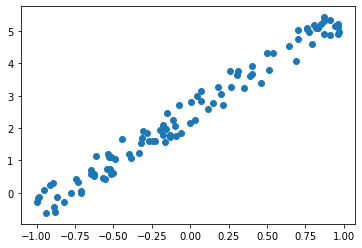

In [10]:
plt.scatter(x[:, 0], y);

- want to find __parameters__ such that you minimize __error__ between points and line `x@a`
    - `a` is unknown
- for regression problem --> most common __error/loss function__ --> **mean squared error**

In [26]:
a = tensor(-1., 1); a

tensor([-1.,  1.])

In [27]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6088)

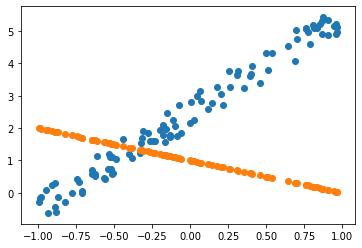

In [28]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat);

- we have model (__linear regression__) and evaluation criteria (__i.e. loss function__)
    - now we need to handle __optimization__ --> __that is, how do we find the best values for `a`?__
    - How do we find the best fitting linear regression?
    
### _Gradient Descent_
- would like to find values that `a` that minimize `mse_loss`
- gradient descent --> algorithm that minimizes functions
    - given function defined by set of parameters
    - starts with initial set of parameter values
    - iteratively moves toward set of parameter values that minimize the function
    - iterative minimization achieved by taking steps in negative direction of the function gradient
    
Here is gradient descent implemented in PyTorch.

In [29]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [30]:
import time

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [31]:
lr = 1e-1
for t in range(100):
    update()

tensor(7.6088, grad_fn=<MeanBackward0>)
tensor(1.4433, grad_fn=<MeanBackward0>)
tensor(0.3889, grad_fn=<MeanBackward0>)
tensor(0.1530, grad_fn=<MeanBackward0>)
tensor(0.0994, grad_fn=<MeanBackward0>)
tensor(0.0872, grad_fn=<MeanBackward0>)
tensor(0.0844, grad_fn=<MeanBackward0>)
tensor(0.0838, grad_fn=<MeanBackward0>)
tensor(0.0836, grad_fn=<MeanBackward0>)
tensor(0.0836, grad_fn=<MeanBackward0>)


In [40]:
adetach = (x@a).detach().numpy()

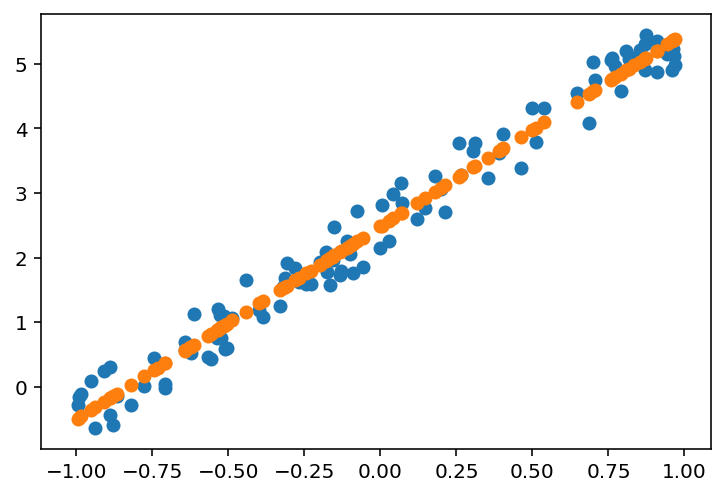

In [45]:
#temp_a = a.detech().numpy()
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], (x@a).detach().numpy());

In [46]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [50]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')
line, = plt.plot(x[:, 0], (x@a).detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach().numpy())
    return line, 

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=10)